In [48]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../')


from astroLuSt.preprocessing import (
    periodanalysis as alprpe,
    timeseries as alprti,
)

np.random.seed(0)

importlib.reload(alprpe)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# Generate Some Data

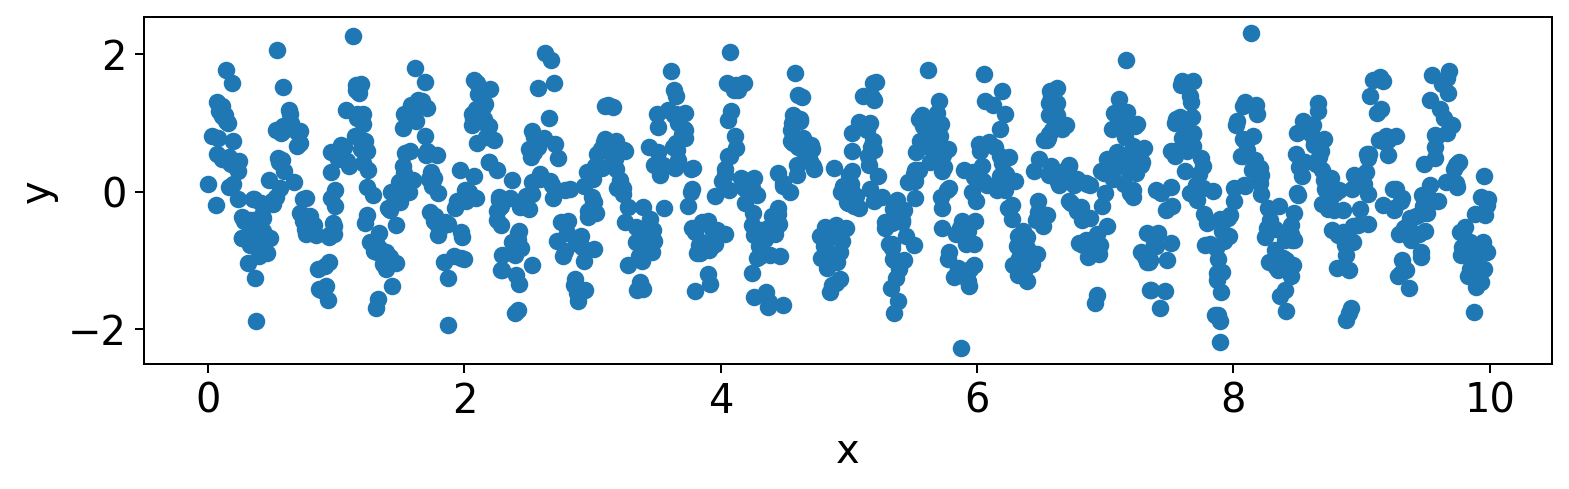

In [49]:
#sine
p = 0.5
x_sin = np.linspace(0,10,1000)
x_sin += np.random.normal(size=x_sin.shape)*0.05
y_sin = np.sin(x_sin*2*np.pi/0.5)  + np.random.normal(size=x_sin.shape)*0.5

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.scatter(x_sin, y_sin)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()



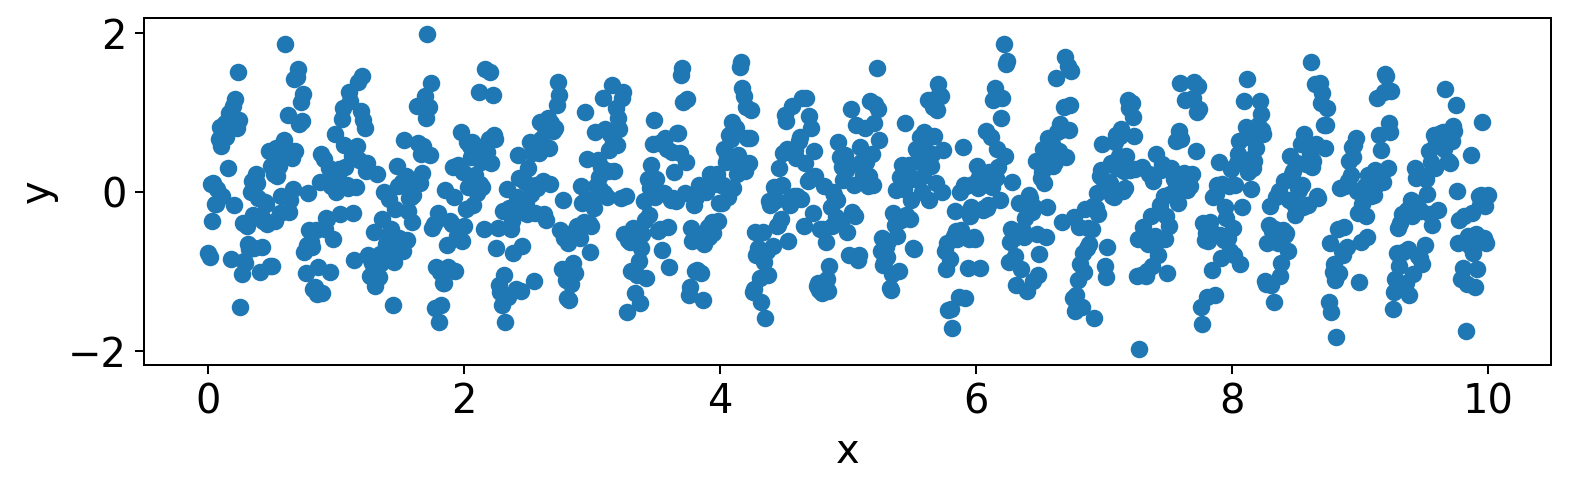

In [50]:
def sawtooth(x:np.ndarray, period:float):
    y = 2*(x/period - np.floor(1/2 + x/period))
    return y

x_saw = np.linspace(0,10,1000)
y_saw = sawtooth(x_saw, period=p) + np.random.normal(size=x_sin.shape)*0.5

fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(111)
ax1.scatter(x_saw, y_saw)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

# Phase Dispersion Minimization

Method for period determination according to [Stellingwerf, 1978](https://ui.adsabs.harvard.edu/abs/1978ApJ...224..953S/abstract).

In [61]:
importlib.reload(alprpe)
PDM = alprpe.PDM(
    period_start=0.1, period_stop=1.4, nperiods=100,
    # trial_periods=np.array([0.5, 1, 0.333]),
    n_retries=5,
    tolerance_expression='*1.01',
    tolerance_decay=0.99,
    nperiods_retry=50,
    breakloop=False,
    n_jobs=2,
    verbose=3,
    binning_kwargs={'nintervals':30},
    parallel_kwargs=dict(backend="threading")
)

print(PDM)


PDM(
    period_start=0.1, period_stop=1.4, nperiods=100,
    n_nyq=None,
    n0=None,
    trial_periods=None,
    npoints_per_interval=None,
    n_retries=5,
    nperiods_retry=50,
    retry_range=0.1,
    tolerance_expression='*1.01',
    tolerance_decay=0.99,
    breakloop=False,
    variance_mode='interval',
    sort_output_by='periods',
    normalize=False,
    n_jobs=2,
    verbose=3,
    binning_kwargs={'nintervals': 30},
    parallel_kwargs={'backend': 'threading'},
)


### Sine-Wave

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 1025 out of 1025 | elapsed:    5.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks     

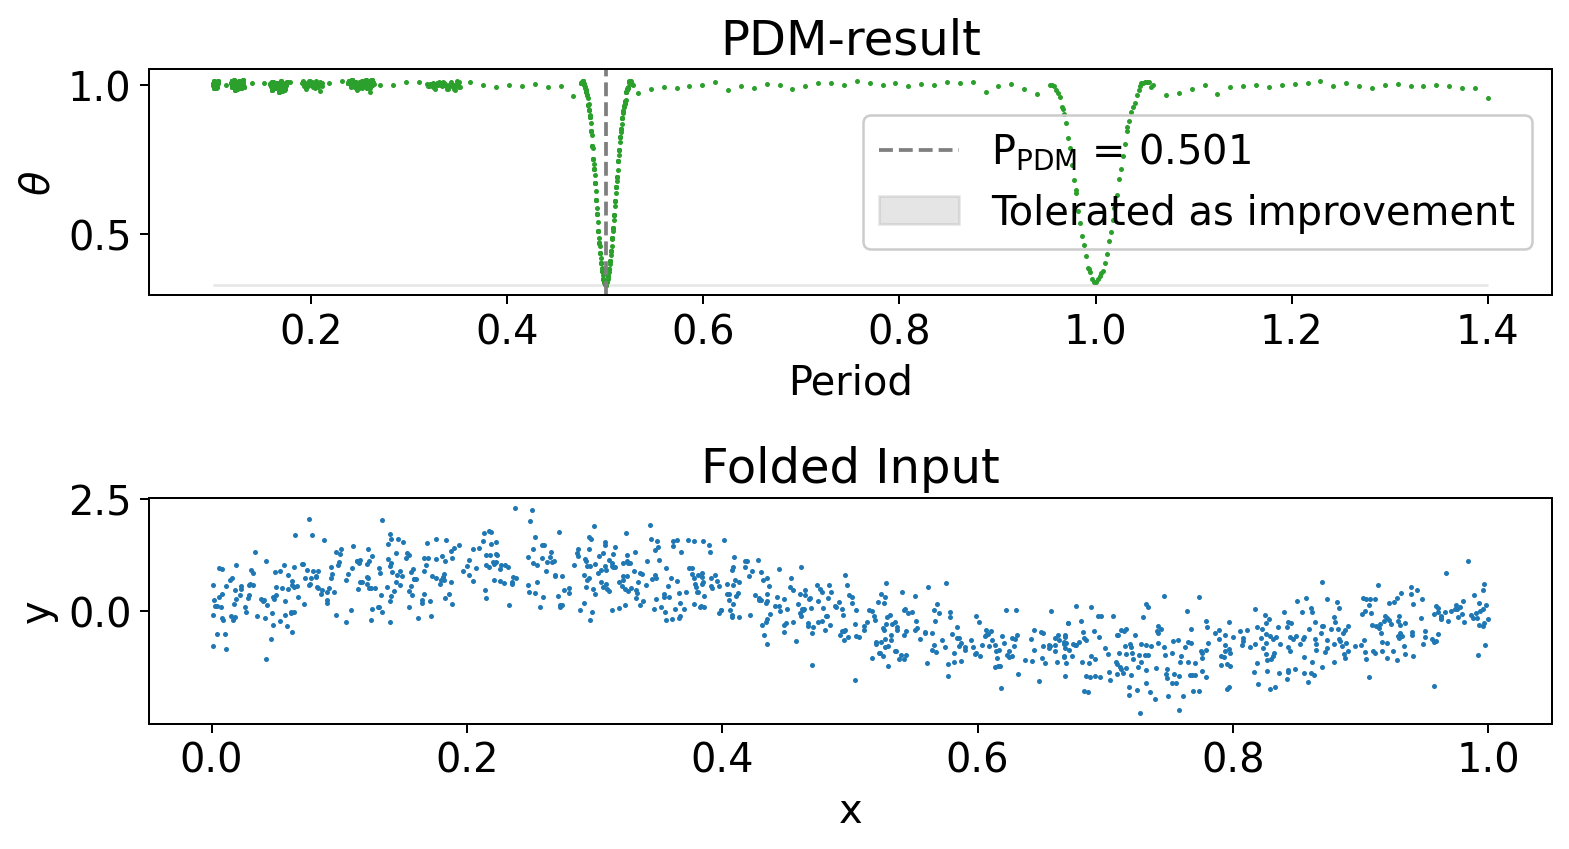

In [66]:
p_pdm, p_pdm_e, theta_pdm = PDM.fit_predict(x_sin, y_sin)
# pdm.fit(x, y)

fig, axs = PDM.plot_result(x_sin, y_sin)
fig.set_figheight(5)
fig.tight_layout()
plt.show()


### Sawtooth Signal

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.1s
/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/preprocessing/binning.py:387: RuntimeWarning: Mean of empty slice
  self.x_binned  = np.append(self.x_binned,  meanfunc_x(self.x[iv_bool]))
/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/preprocessing/binning.py:388: RuntimeWarning: Mean of empty slice
  self.y_binned  = np.append(self.y_binned,  meanfunc_y(self.y[iv_bool]))
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 350 out of 350 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend wi

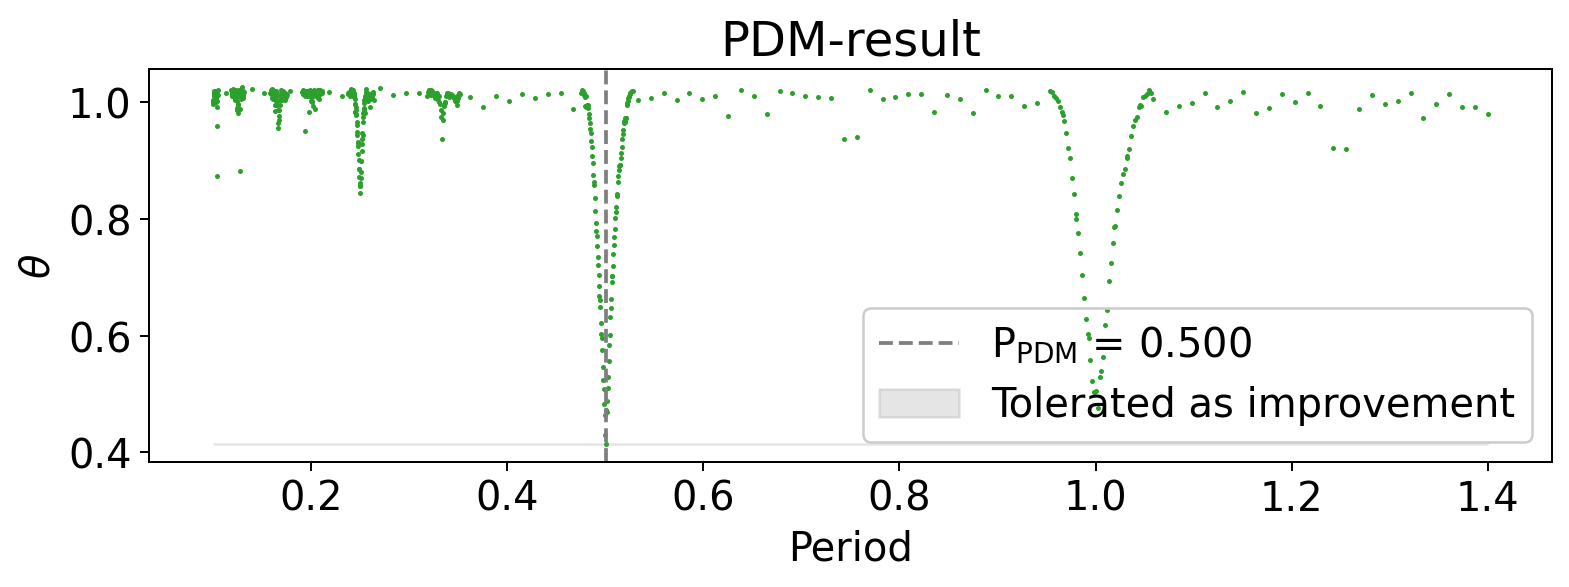

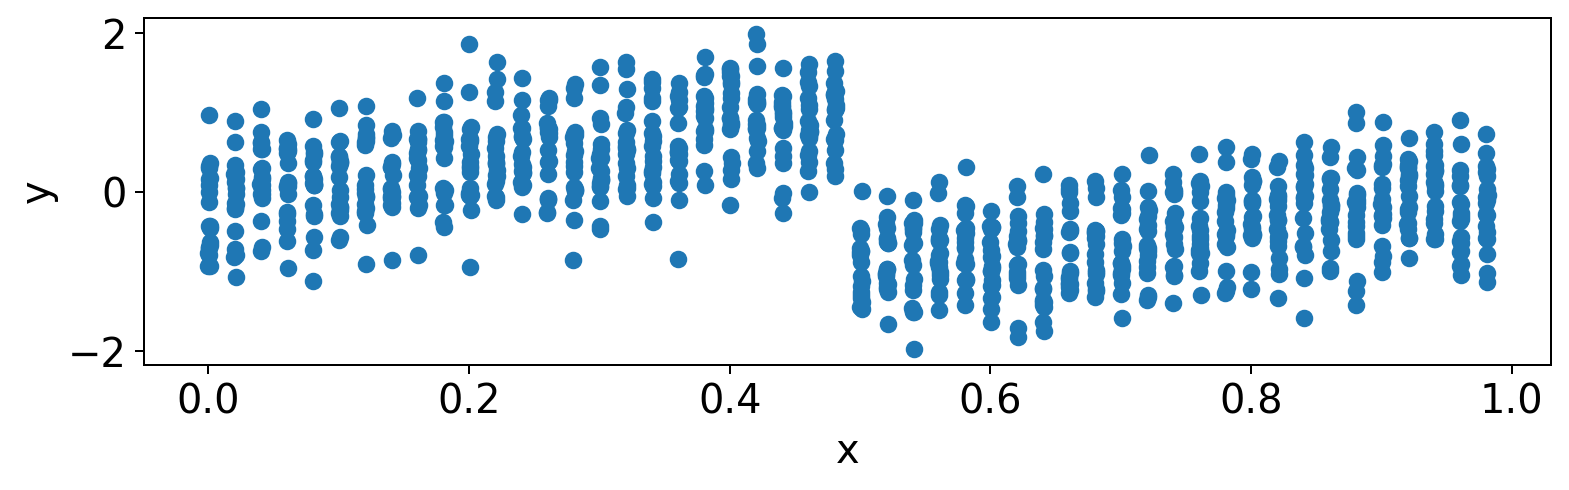

In [63]:
p_pdm, p_pdm_e, theta_pdm = PDM.fit_predict(x_saw, y_saw)
# pdm.fit(x, y)

fig, axs = PDM.plot_result()
fig.set_figheight(3)

#fold dataseries onto period
ph, pe = alprti.fold(x_saw, p_pdm)
fig = plt.figure(figsize=(9,3))
plt.scatter(ph, y_saw)
plt.xlabel("x")
plt.ylabel("y")
plt.show()